# Principal Component Analysis (PCA)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.decomposition import PCA
import scipy.linalg as la
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
wine = pd.read_csv("/wine.csv")
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [4]:
 wines = wine.iloc[:,1:]
wines.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
# Converting into numpy array
array = wines.values
array

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [6]:
# Normalizing the numerical data 
wine_norm= scale(array)
wine_norm

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [7]:
# to create an instance of pc values and give output as per given components
pca = PCA(n_components = 13)
w_pca= pca.fit_transform(wine_norm)
w_pca

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [8]:
# eigen vectors
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

In [9]:
# amount of variance each PCA contains individually
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [10]:
# Cumulative variance of PCA
c_var = np.cumsum(np.round(var,decimals = 4)*100)
c_var

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

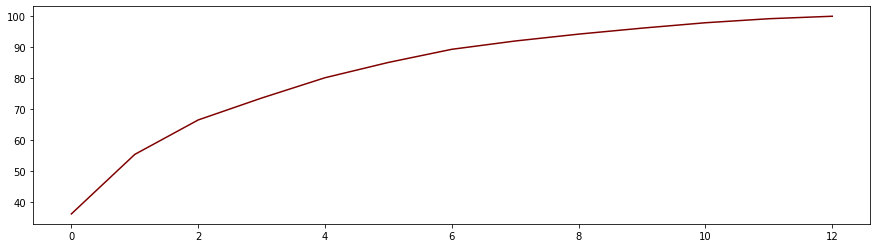

In [11]:
# Variance plot for PCA components obtained 
plt.figure(figsize = (15,4))
plt.plot(c_var,color="maroon");

**The first 3 PCA covers approximately 67% of the total data.**

In [12]:
# merging PCA columns with the wine type
wine_final= pd.concat([pd.DataFrame(w_pca[:,0:3],columns=["PC1","PC2","PC3"]), wine[["Type"]]], axis = 1)

In [13]:
# replacing the values of type starting from 0 so that it can be compared easily
wine_final["Type"]=wine_final["Type"].replace(1,0)
wine_final["Type"]=wine_final["Type"].replace(2,1)
wine_final["Type"]=wine_final["Type"].replace(3,2)
wine_final.head()

,PC1,PC2,PC3,Type
0,3.316751,-1.443463,-0.165739,0
1,2.209465,0.333393,-2.026457,0
2,2.516740,-1.031151,0.982819,0
3,3.757066,-2.756372,-0.176192,0
4,1.008908,-0.869831,2.026688,0


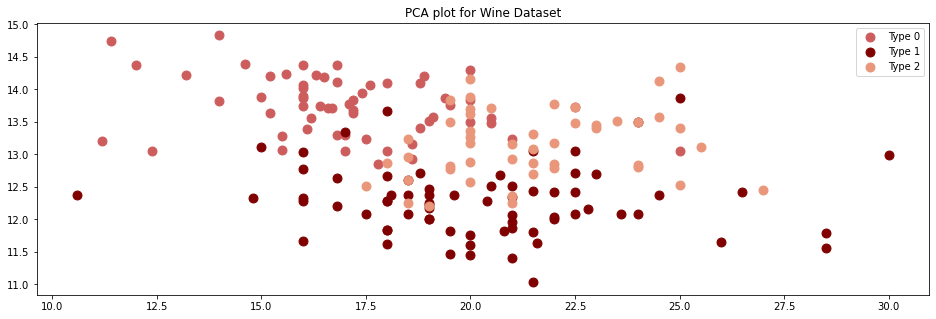

In [14]:
plt.figure(figsize = (16,5))
plt.scatter(array[wine_final["Type"] == 0, 3],array[wine_final["Type"] == 0, 0], s =80, c = "indianred", label = 'Type 0')
plt.scatter(array[wine_final["Type"] == 1, 3],array[wine_final["Type"] == 1, 0], s =80,  c = "maroon", label = 'Type 1')
plt.scatter(array[wine_final["Type"] == 2, 3],array[wine_final["Type"] == 2, 0], s =80,  c = "darksalmon", label = 'Type 2')
plt.title('PCA plot for Wine Dataset')
plt.legend();

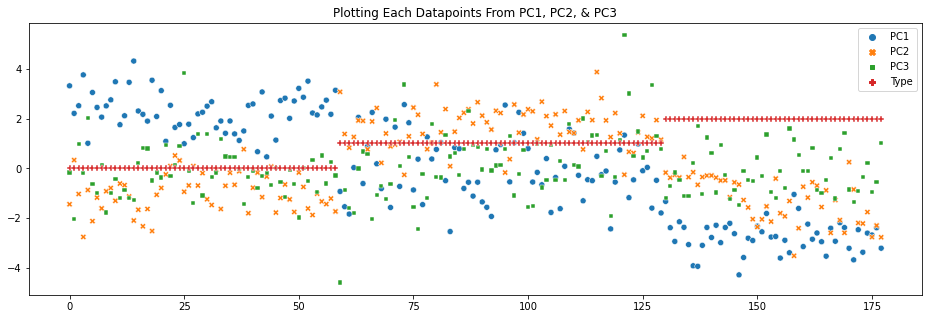

In [15]:
#Plotting Each Datapoints
plt.figure(figsize = (16,5))
sns.scatterplot(data = wine_final)
plt.title('Plotting Each Datapoints From PC1, PC2, & PC3')
plt.show();

# Hierarchical Clustering

In [16]:
wine_final.head()

,PC1,PC2,PC3,Type
0,3.316751,-1.443463,-0.165739,0
1,2.209465,0.333393,-2.026457,0
2,2.516740,-1.031151,0.982819,0
3,3.757066,-2.756372,-0.176192,0
4,1.008908,-0.869831,2.026688,0


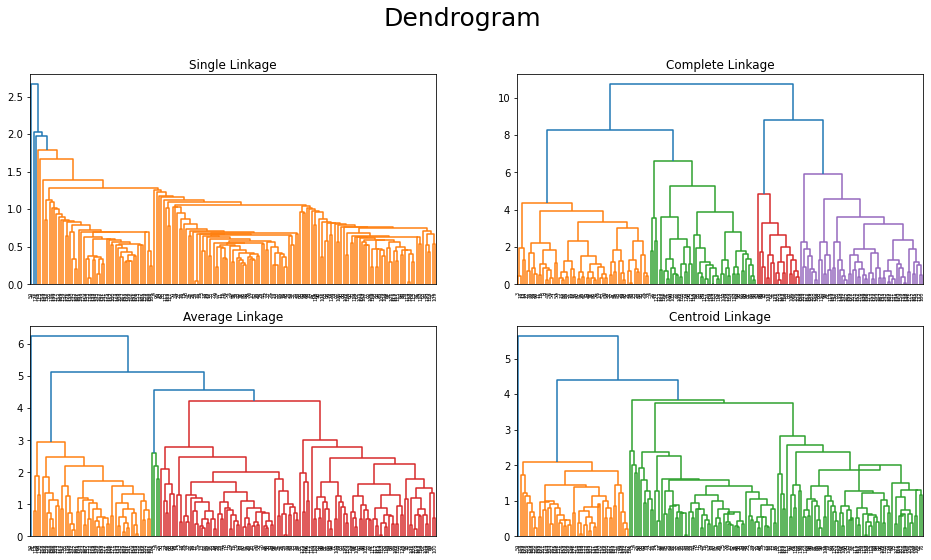

In [17]:
fig = plt.figure(figsize=(16,8.5))
plt.suptitle("Dendrogram", size=25, y=0.99)
plt.subplot(2,2,1)
dendrogram = sch.dendrogram(sch.linkage(wine_final, method="single"))
plt.title("Single Linkage")

plt.subplot(2,2,2)
dendrogram = sch.dendrogram(sch.linkage(wine_final, method="complete"))
plt.title("Complete Linkage")

plt.subplot(2,2,3)
dendrogram = sch.dendrogram(sch.linkage(wine_final, method="average"))
plt.title("Average Linkage")

plt.subplot(2,2,4)
dendrogram = sch.dendrogram(sch.linkage(wine_final, method="centroid"))
plt.title("Centroid Linkage");

In [18]:
# creating 3 clusters using complete linkage
hc = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "complete") 

In [19]:
# segregating as per no. of cluster given and creating a data frame
y_hc = hc.fit_predict(wine_final)
Clusters=pd.DataFrame(y_hc,columns=["Clusters"])
Clusters.tail()

,Clusters
173,1
174,1
175,1
176,1
177,1


In [20]:
# adding the created column of clusters segregated to the original data set 
wine_final["H_clusters"] = hc.labels_
wine_final.head()

,PC1,PC2,PC3,Type,H_clusters
0,3.316751,-1.443463,-0.165739,0,0
1,2.209465,0.333393,-2.026457,0,0
2,2.516740,-1.031151,0.982819,0,0
3,3.757066,-2.756372,-0.176192,0,0
4,1.008908,-0.869831,2.026688,0,0


In [21]:
# mean values column wise for each cluster 
wine_final.groupby("H_clusters").agg(["mean"]).reset_index()

,H_clusters,PC1,PC2,PC3,Type
,,mean,mean,mean,mean
0,0,1.313975,0.120590,0.357938,0.438095
1,1,-2.641654,-1.017061,-0.266749,1.888889
2,2,0.246418,2.224177,-1.219950,1.000000


# K-Means Clustering

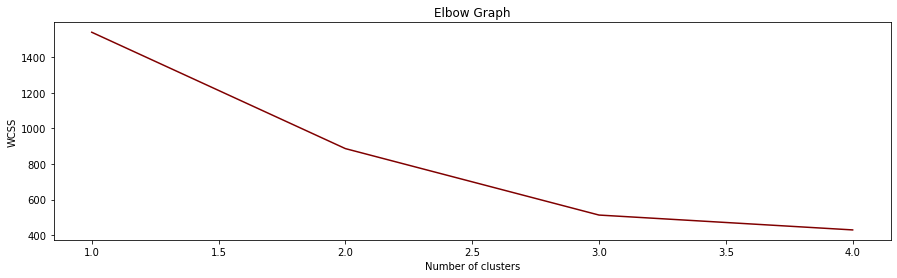

In [22]:
# Scree Plot
wcss = []  
for i in range(1, 5):
    kmeans = KMeans(n_clusters=i,random_state=50)
    kmeans.fit(wine_final.iloc[:,0:3])
    wcss.append(kmeans.inertia_)
    
fig = plt.figure(figsize=(15,4))   
plt.plot(range(1,5), wcss,color="maroon")
plt.title("Elbow Graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show();

In [23]:
# wcss(Within Cluster Sum of Squares) values for each no. of cluster
pd.DataFrame(wcss)

,0
0,1539.503480
1,886.161136
2,513.056465
3,429.628082


**From the above Scree plot and wcss values the optimal k=3**

In [24]:
# Build Cluster algorithm as per k-value (3)
wine_clusters = KMeans(3, random_state=50)
wine_clusters.fit(wine_final.iloc[:,0:3])

KMeans(n_clusters=3, random_state=50)

In [25]:
# Assign clusters to the data set by creating and adding it as new column to the orginal data
wine_final["KM_clusters"] = wine_clusters.labels_
wine_final.head()

,PC1,PC2,PC3,Type,H_clusters,KM_clusters
0,3.316751,-1.443463,-0.165739,0,0,0
1,2.209465,0.333393,-2.026457,0,0,0
2,2.516740,-1.031151,0.982819,0,0,0
3,3.757066,-2.756372,-0.176192,0,0,0
4,1.008908,-0.869831,2.026688,0,0,0


In [26]:
# mean values column wise for each cluster 
wine_final.groupby("KM_clusters").agg(["mean"]).reset_index()

,KM_clusters,PC1,PC2,PC3,Type,H_clusters
,,mean,mean,mean,mean,mean
0,0,2.276194,-0.932054,0.001528,0.048387,0.000000
1,1,-2.720036,-1.125651,-0.239093,1.941176,1.000000
2,2,-0.036957,1.772239,0.186139,1.000000,0.630769


,Type,H_clusters,KM_clusters
1,71,54,51
0,59,105,62
2,48,19,65


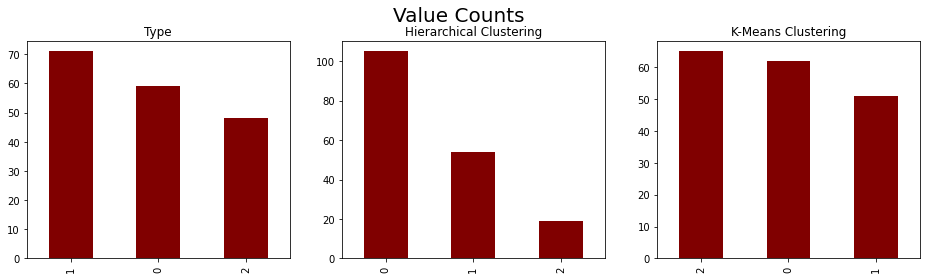

In [27]:
# no. of records in each cluster
a = pd.DataFrame(wine_final["Type"].value_counts())
b = pd.DataFrame(wine_final["H_clusters"].value_counts())
c = pd.DataFrame(wine_final["KM_clusters"].value_counts())
count = pd.DataFrame()
count["Type"]=a
count["H_clusters"]=b
count["KM_clusters"]=c

# Bar plot of value counts in original data and clustering methods
fig = plt.figure(figsize=(16,4))
plt.suptitle("Value Counts", size=20, y=1)
plt.subplot(1,3,1)
wine_final["Type"].value_counts().plot(kind="bar",color="maroon")
plt.title("Type")

plt.subplot(1,3,2)
wine_final["H_clusters"].value_counts().plot(kind="bar",color="maroon")
plt.title("Hierarchical Clustering")

plt.subplot(1,3,3)
wine_final["KM_clusters"].value_counts().plot(kind="bar",color="maroon")
plt.title("K-Means Clustering")

count

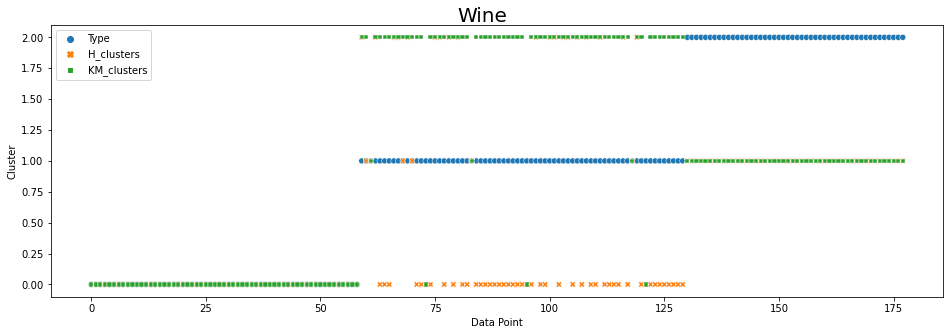

In [28]:
#Plotting Each Method
plt.figure(figsize = (16,5))
plt.suptitle("Wine", size=20, y=0.93)
sns.scatterplot(data = wine_final.iloc[:,3:])
plt.xlabel("Data Point")
plt.ylabel("Cluster")
plt.show();

In [29]:
print("ACCURACY :\nHierarchical Clustering Accuracy - ",
      round(accuracy_score(wine_final["Type"],wine_final["H_clusters"])*100,4),"%"
      "\nK-Means Clustering Accuracy      - ",round(accuracy_score(wine_final["Type"], wine_final["KM_clusters"])*100,4),"%")

ACCURACY :
Hierarchical Clustering Accuracy -  36.5169 %
K-Means Clustering Accuracy      -  34.8315 %


**As per Accuracy Hierarchical Clustering is more better than K-Means Clustering,But still the model should be improved to get more accurate classification.**